# Van der Pol oscillator


The Van der Pol oscillator was introduced by the Dutch physicist Balthasar van der Pol.
This is a famous model, typically investigated in the study of nonlinear dynamics.
It has been used in several practical problems of engineering, e.g. circuits
containing vacuum tubes. For more information on the model see the wikipedia article
[Van der Pol oscillator](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator).

## Dynamics

The dynamics of the Van der Pol oscillator are described by the following ODE with
two variables:

$$
\begin{aligned}
  \dot{x} &= y \\
  \dot{y} &= \mu (1 - x^2) y - x
\end{aligned}
$$
The system has a stable limit cycle. Such limit cycle becomes increasingly sharp
for higher values of ``μ``. Here we consider the parameter ``μ = 1``.

In [1]:
using ReachabilityAnalysis, Plots

@taylorize function vanderpol!(dx, x, params, t)
    local μ = 1.0
    dx[1] = x[2]
    dx[2] = (μ * x[2]) * (1 - x[1]^2) - x[1]
    return dx
end

## Specification

We set the initial condition ``x(0) ∈ [1.25, 1.55]``, ``y(0) ∈ [2.35,2.45]``.
The *unsafe set* is given by ``y ≥ 2.75`` for a time span ``[0, 7]``.
In other words, we would like to prove that there doesn't exist a solution of
the model with a ``y`` value which is greater than 2.75, for any initial condition
on the given domain. Th time horizon of ``T = 7`` is chosen such that the oscillator
can do at least one full cycle.

## Results

We proceed by defining the initial conditions as a hyperrectangular set according
to the problem's specifications. Then we build the initial-value problem and pass
it to the `solve` function. We specify using `TMJets` algorithm with default options.

In [2]:
X0 = Hyperrectangle(low=[1.25, 2.35], high=[1.55, 2.45])
prob = @ivp(x' = vanderpol!(x), dim=2, x(0) ∈ X0)
sol = solve(prob, T=7.0, alg=TMJets());

For further computations, it is convenient to work with a zonotopic overapproximation
of the flowpipe.

In [3]:
solz = overapproximate(sol, Zonotope);

The maximum value of variable ``y`` is obtained by computing the support function
of the flowpipe along direction ``[0, 1]``:

In [4]:
ρ([0.0, 1.0], solz)

2.7166897124333174

That shows that the property is satisfied. Below we plot the flowpipe in the
x-y plane, together with the horizontal line ``y = 2.75``.

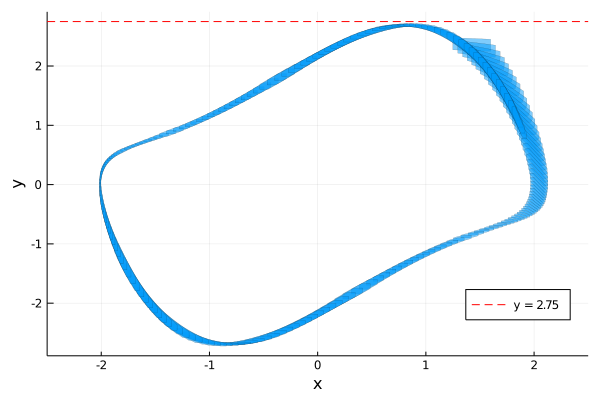

In [5]:
plot(solz, vars=(1, 2), lw=0.2, xlims=(-2.5, 2.5), xlab="x", ylab="y")
plot!(x -> 2.75, color=:red, lab="y = 2.75", style=:dash, legend=:bottomright)

### Limit cycle

We can use the reachability result to examine the limit cycle of the system. In
other words, we can see that the flowpipe re-enters from where it started after
giving one loop.

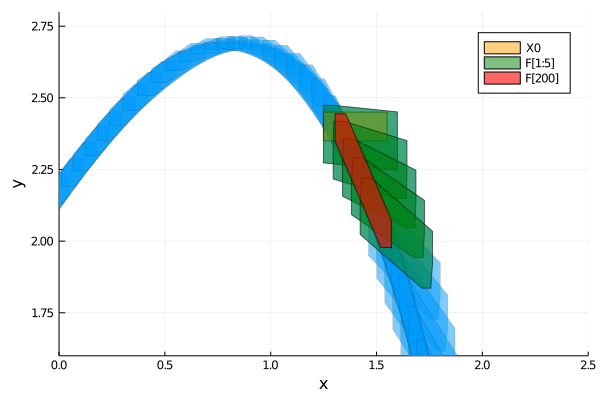

In [6]:
plot(solz, vars=(1, 2), lw=0.2, xlims=(0.0, 2.5), ylims=(1.6, 2.8), xlab="x", ylab="y")
plot!(X0, color=:orange, lab="X0")
plot!(solz[1:5], vars=(1, 2), color=:green, lw=1.0, alpha=0.5, lab="F[1:5]")
plot!(solz[200], vars=(1, 2), color=:red, lw=1.0, alpha=0.6, lab="F[200]")

It is seen that the reach-set corresponding to the time-span

In [7]:
tspan(solz[200])

[6.72038, 6.74064]

is included in the set union ``F[1] \cup \cdots \cup F[5]`` of previously
computed reach-sets. This in fact constitutes a proof that the system has a limit cycle,
because all future trajectories starting from `solz[200]` are already covered by the flowpipe.